In [10]:
conda install -c conda-forge python-cufflinks


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/luap/anaconda3

  added / updated specs:
    - python-cufflinks


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge
    chart-studio-1.1.0         |     pyh9f0ad1d_0          51 KB  conda-forge
    colorlover-0.3.0           |             py_0          12 KB  conda-forge
    conda-4.6.14               |           py36_0         2.1 MB  conda-forge
    plotly-4.12.0              |     pyh9f0ad1d_0         5.9 MB  conda-forge
    python-cufflinks-0.17.3    |             py_0          59 KB  conda-forge
    retrying-1.3.3             |             py_2          11 K

In [49]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs , init_notebook_mode, plot , iplot
import plotly as plt
from sklearn  import preprocessing
import seaborn as sns
init_notebook_mode(connected = True)
cf.go_offline()

In [34]:
df = pd.read_csv('Titanic Data.csv')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


1. Show the age distribution in the data using a histogram.

In [39]:

df['Age'].iplot(kind = "histogram",title = 'Age distribution in the data using a histogram.')

2. Show the age distribution based on gender using a histogram.

In [46]:
df['Age_male'] = df[df['Sex'] == 'male']['Age']
df['Age_female'] = df[df['Sex'] == 'female']['Age']
dff = df[['Age_female', 'Age_male']]
dff.iplot(kind = 'histogram',title='Age distribution based on gender using a histogram.')


3. Using the function df.corr() to identify the correlation within the data, represent its results using a form of a matrix plot.

In [47]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_male,Age_female
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006191,0.085899
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.119618,0.116109
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.392754,-0.386217
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.334982,-0.241442
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.232419,-0.118539
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.077331,0.171468
Age_male,0.006191,-0.119618,-0.392754,1.000000,-0.334982,-0.232419,0.077331,1.000000,NaN
Age_female,0.085899,0.116109,-0.386217,1.000000,-0.241442,-0.118539,0.171468,NaN,1.000000


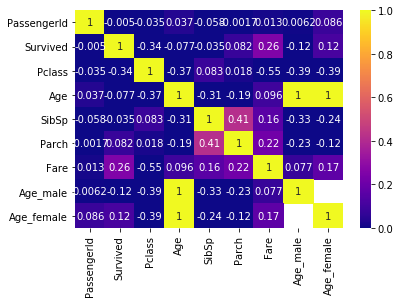

In [50]:
sns.heatmap(cor, vmin = 0, vmax =1 ,cmap = 'plasma', annot = True)

4. Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns.

In [55]:
table = df[['Pclass','Fare']].pivot(columns = 'Pclass', values = 'Fare')
table

Pclass,1,2,3
0,NaN,NaN,7.250
1,71.2833,NaN,NaN
2,NaN,NaN,7.925
3,53.1000,NaN,NaN
4,NaN,NaN,8.050
...,...,...,...
886,NaN,13.0,NaN
887,30.0000,NaN,NaN
888,NaN,NaN,23.450
889,30.0000,NaN,NaN


In [57]:
table.iplot(kind = 'box', title  ='boxplot to show the distribution of the values in its 3 columns(Pclass).')

5. Graph the value counts of the number of passengers who survived and did not survive
based on gender using a stacked bar graph.

In [ ]:
df.head()

In [ ]:
sns.countplot(x= 'Survived',hue = 'Sex', data= df)

6. Using a scatter plot, plot the ages to the fare paid by the each passenger based on their
gender.

In [59]:
df.iplot(kind = 'scatter', x="Age", y="Fare", categories = 'Sex')

/home/luap/anaconda3/lib/python3.6/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/luap/anaconda3/lib/python3.6/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



7. Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether
they survived or not. The size of each bubble should be determined by the passenger class
and the name of each individual as the hover name.

In [78]:
df.iplot(kind = 'scatter', x="Age", y="Fare", categories = 'Survived', 
        text = 'Name', size = 'Pclass')